# Programming Assignment 1: Linear Regression

## Part II: Pandemic Data Analysis

### Import the packages

In class, we have learned linear regression. In this section, we will take through a simple experiment to see how it works. We are going to use `numpy` , `pandas` and `matplotlib` packages in Python, the first thing we need to do is to import them.

In [72]:
%matplotlib inline
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# time packages are used to measure the convergence speed
import time
# there might be some warnings due to the different versions of python and packages you installed.
# here we choose to suppress these warnings.
# but don't ignore warnings unless you know you are absolutely right!
import warnings
warnings.filterwarnings("ignore")
num_features = 15

In this demo, two datasets have been provided. Both of them contain the number of people infected by Covid-19 for a period of time. Linear regression will be used to train a function fitting the distribution of the data and accurately predict the future trend.

Firstly, the dataset is displayed as follows.

### Display the dataset

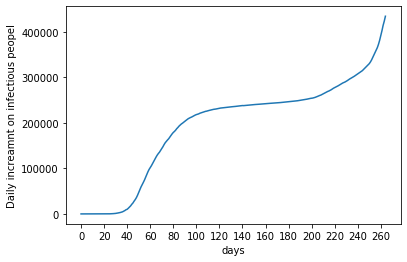

In [73]:
import scipy.io as scio
 
dataFile = './italy.mat'
data = scio.loadmat(dataFile)['I'][0]
# visualize the dataset
plt.plot(data)
plt.ylabel('Daily increamnt on infectious peopel')
plt.xlabel('days')
# set axis scale
my_x_ticks = np.arange(0, len(data)-1, 20)
plt.xticks(my_x_ticks)
plt.show()

### Prepare the data

In [74]:
# the training data and testing data from dataset
train_data_x = np.array(np.arange(50))
test_data_x = np.array(np.arange(51, 56))
train_data_y = np.array(data[:50])
test_data_y = np.array(data[51:56])

#### Q1: Fit a Linear Regression model that estimates the number of infections per day based on time using the data from Day 1-50. Hint: You can reuse the normal equation implementation (linear_regression) in Part 1. Use this model to predict the number of infections for the next five days (Day 51-55).  Evaluate your model by computing the MSE error.

the estimated parameter using normal equation is [[306.37565863]]
the MSE error is 11693529796.526731


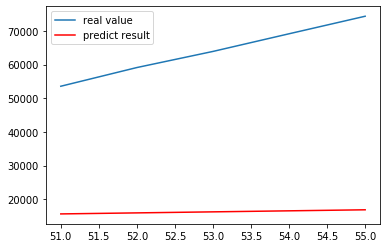

In [75]:
# replace following blanks with your implementation
def MSE(y_predic, y_test):
    mse = np.sum((y_test - y_predic) ** 2) / len(y_test)
    return mse
def linear_regression(X, y):
    return np.linalg.inv((X.transpose()@X))@X.transpose()@y

train_data_x = train_data_x.reshape(len(train_data_x),1)
train_data_y = train_data_y.reshape(len(train_data_y),1)
theta_linear_regression = linear_regression(train_data_x, train_data_y)
print('the estimated parameter using normal equation is {}'.format(theta_linear_regression))
test_data_x = test_data_x.reshape(len(test_data_x),1)
y_predic = np.dot(test_data_x, theta_linear_regression.T)
mseValue = MSE(y_predic, test_data_y)
print('the MSE error is {}'.format(mseValue))
plt.plot(test_data_x,test_data_y)
plt.plot(test_data_x,y_predic,color='r')
plt.legend(labels=["real value","predict result"])
plt.show()

#### Q2: Repeat Q1 using ridge regression which is implemented in ***Linear_Regression_Methods***.  

the estimated parameter using normal equation is [[306.36807995]]
the MSE error is 11693721761.549633


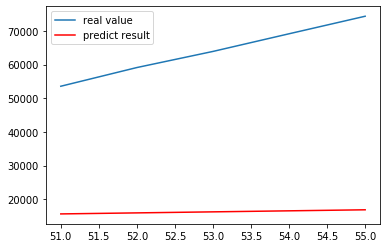

In [21]:
# replace following blanks with your implementation
def ridge_regression(X, y, alpha = 1):
    # parameters: inpuy samples X, corresponding labels y, regularizer weight alpha (1 in default)
    # return: estimated theta
    # replace following blanks with your implementation
    return np.linalg.inv((X.transpose()@X)+alpha*np.identity(num_features))@X.transpose()@y
        
# alpha=1 in default but it can change for the optimization of the final result
# for alpha in np.arange(0, 0.1, 0.01):
num_features = train_data_x.shape[1]
theta_ridge_regression = ridge_regression(train_data_x, train_data_y)
print('the estimated parameter using normal equation is {}'.format(theta_ridge_regression))
y_predicLR = np.dot(test_data_x, theta_ridge_regression.T)
mseValue = MSE(y_predicLR, test_data_y)
print('the MSE error is {}'.format(mseValue))
plt.plot(test_data_x,test_data_y)
plt.plot(test_data_x,y_predicLR,color='r')
plt.legend(labels=["real value","predict result"])
plt.show()

#### Q3: Repeat Q1 using locally weighted Linear Regression (locally_weighted_Linear_Regression) implemented in Part i.

It will take about 10 seconds to do the iterative calculation......
And because the larger x distance leads to smaller w, the approximation of the last value is not as good as the previous four.
the MSE Loss of the Locally weighted Linear Regression is 192695.22254083754


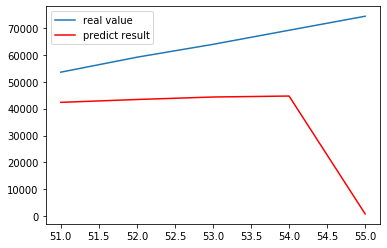

In [68]:
# replace following blanks with your implementation
def locally_weighted_Linear_Regression(X, y, Xtest, max_epoch, alpha, tau, win_len):
    # parameters: inpuy samples X, corresponding labels y, , maximum number of iteration max_epoch, learning rate alpha, bandwidth tau, slide window lwngth win_len
    # return: The MSEerror between estimated label for each x(i) and ground truth label
    # MSEerror mwans the average of the summation of the squared error between the prediction and ground truth, which is a metracs to measure the fitness of a model
    # hint: for each linear model we only have 10 samples, please set your lr a little bit higher for better performance
    y_predic = []
    diffSquare = []
    for i in range(Xtest.shape[0]):
        sortDis = np.argsort(abs(X-Xtest[i]),axis=0)
        W = np.zeros(len(y))
        for j in range(win_len):
            W[sortDis[j]] = np.exp(-(Xtest[i]-X[sortDis[j]])**2/(2*tau))
        W = np.array(W)
        theta_LWLR = 0
        for epoch in range(max_epoch):
            if np.linalg.norm(np.dot(X[sortDis[0]], theta_LWLR)-y[sortDis[0]])<= 1e-3:
                break
            # each epoch we use whole data to compute the gradient and update the parameter
            deriv = np.dot(np.dot(X.T*W, X),theta_LWLR) - np.dot(X.T*W, y)
            # update the parameter
            theta_LWLR -= alpha* deriv
        # each x(i) has a predicted y
        y_predic.append(float(theta_LWLR*Xtest[i]))
    return y_predic

print('It will take about 10 seconds to do the iterative calculation......')
print('And because the larger x distance leads to smaller w, the approximation of the last value is not as good as the previous four.')
y_predicLWLR = locally_weighted_Linear_Regression(train_data_x, train_data_y, test_data_x, 100000, 0.005, 1, 20)
print('the MSE Loss of the Locally weighted Linear Regression is {}'.format(MSE_error_LWLR))
plt.plot(test_data_x,test_data_y)
plt.plot(test_data_x,y_predicLWLR,color='r')
plt.legend(labels=["real value","predict result"])
plt.show()

#### Optional Question: If you correctly implement linear regression on the pandemic data, you will find it hard to fit a linear model with the given data for its non-linearity. Therefore, in this question you can try to add some non-linearity to your basic linear regression model, e.g. adding logarithmic, polynomial or exponential terms to the model. 
#### (1) Please design and implement an improved model and compare its results with previous methods. 
#### (2) Discuss its advantages and limitations. 

the estimated parameter using normal equation is [[9.29168872]]
the MSE error is 7467030200.384424


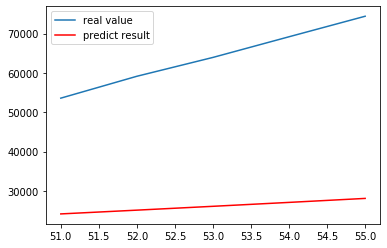

In [96]:
# replace following blanks with your implementation
# replace following blanks with your implementation
def MSE(y_predic, y_test):
    mse = np.sum((y_test - y_predic) ** 2) / len(y_test)
    return mse

def multy_regression(X, y):
#     theta1 = np.linalg.inv((X.transpose()@X))@(X.transpose()@y-X.transpose()@np.exp(X)*0)
#     theta2 = np.linalg.inv((np.exp(X).transpose()@np.exp(X)))@(np.exp(X).transpose()@y-np.exp(X).transpose()@X*theta1)
    theta2 = np.linalg.inv((X*X).T@(X*X))@((X*X).T@y)
    return theta2


theta_2 = multy_regression(train_data_x, train_data_y)
print('the estimated parameter using normal equation is {}'.format(theta_2))
y_predicOQ = np.dot(test_data_x*test_data_x, theta_2)
mseValue = MSE(y_predicOQ, test_data_y)
print('the MSE error is {}'.format(mseValue))
plt.plot(test_data_x,test_data_y)
plt.plot(test_data_x,y_predicOQ,color='r')
plt.legend(labels=["real value","predict result"])
plt.show()

**Advantage:** The prediction result can better fit the ground truth value compared with linear regression.(MSE is a little bit smaller)   
**Limitation:** In order to get the analytical result for each $θ$, we need to have a fixed function of y_predic(x). But the function is decided by intuition. So the result it still not good.